In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, learning_curve
# Function to create the ANN model
import time

# Membaca file CSV
data = pd.read_csv('gldm_features_Data_Enhance.csv')

# Membuat DataFrame dari data
df = pd.DataFrame(data)

# Menampilkan DataFrame
print(df.columns)


Index(['Image', 'Contrast_0', 'Contrast_45', 'Contrast_90', 'Contrast_135',
       'ASM_0', 'ASM_45', 'ASM_90', 'ASM_135', 'Entropy_0', 'Entropy_45',
       'Entropy_90', 'Entropy_135', 'Mean_0', 'Mean_45', 'Mean_90', 'Mean_135',
       'IDM_0', 'IDM_45', 'IDM_90', 'IDM_135'],
      dtype='object')


      Contrast_0     ASM_0  Entropy_0    Mean_0     IDM_0  Label
0       0.287182 -0.557690  -0.047737 -0.459268 -0.078325    0.0
1      -1.745655 -1.271082   0.226403 -1.833634  0.106960    0.0
2      -1.111166 -0.904269   0.329604 -0.997136 -0.017579    0.0
3      -0.632149  5.575218  -0.859663  3.443733  0.059382    0.0
4      -0.339730  0.866295  -0.117553  0.988058 -0.036714    0.0
...          ...       ...        ...       ...       ...    ...
1195   -0.115805 -0.922583   0.403023 -1.034519 -0.071007    1.0
1196   -0.894313 -0.504913   0.794715 -0.441384 -0.021711    1.0
1197   -0.258452  1.109520   0.745241  1.161275 -0.037566    1.0
1198   -1.389101  1.044687   1.059606  1.100050  0.125199    1.0
1199    1.213954  0.533443   1.505402  0.672751 -0.087300    1.0

[1200 rows x 6 columns]


C:\Users\hanif\AppData\Local\Temp\ipykernel_2112\1327083212.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_direction.loc[:600, 'Label'] = 0
C:\Users\hanif\AppData\Local\Temp\ipykernel_2112\1327083212.py:53: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


24/24 [==============================] - 0s 1ms/step


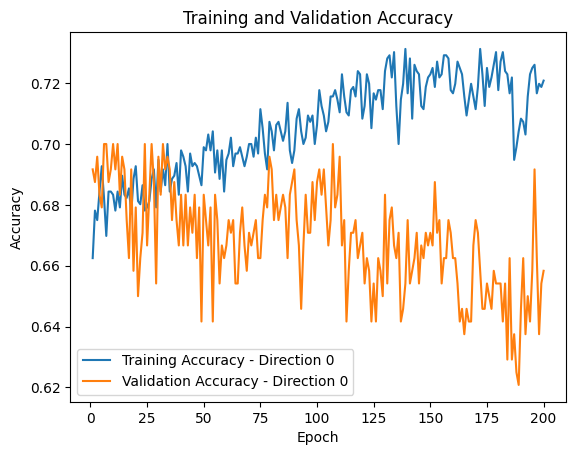

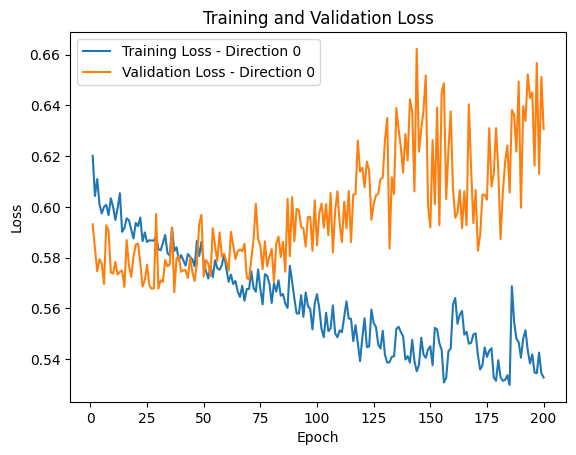

6/6 [==============================] - 0s 0s/step
Best Model: <keras.wrappers.scikit_learn.KerasClassifier object at 0x00000214E8FAA460>
Best Accuracy of Model: 0.6687500000000001

30/30 [==============================] - 0s 538us/step
Training Accuracy: 0.734375
Validation Accuracy: 0.6583333333333333
Training F1 Score: 0.7219193020719739
Validation F1 Score: 0.6132075471698113
Training Precision: 0.7609195402298851
Validation Precision: 0.6914893617021277
Cross-Validation Scores: [0.64583333 0.56770833 0.69791667 0.60416667 0.671875  ]
      Contrast_45    ASM_45  Entropy_45   Mean_45    IDM_45  Label
0       -0.527308 -0.557690   -0.047737 -0.459268 -0.078325    0.0
1       -1.672462 -1.271082    0.226403 -1.833634  0.106960    0.0
2       -1.020774 -0.904269    0.329604 -0.997136 -0.017579    0.0
3        4.098488  5.575218   -0.859663  3.443733  0.059382    0.0
4        0.978283  0.866295   -0.117553  0.988058 -0.036714    0.0
...           ...       ...         ...       ...     

C:\Users\hanif\AppData\Local\Temp\ipykernel_2112\1327083212.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_direction.loc[:600, 'Label'] = 0
C:\Users\hanif\AppData\Local\Temp\ipykernel_2112\1327083212.py:53: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


24/24 [==============================] - 0s 678us/step


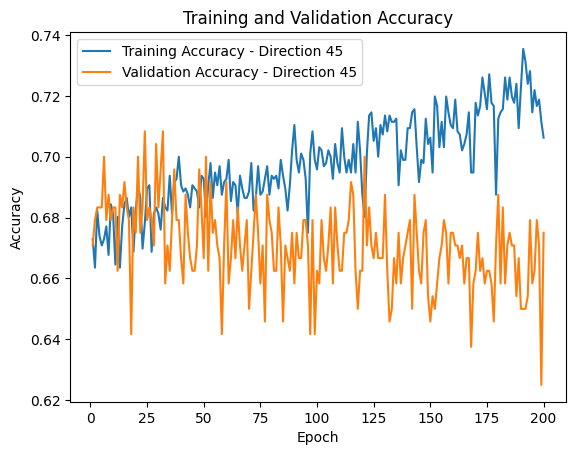

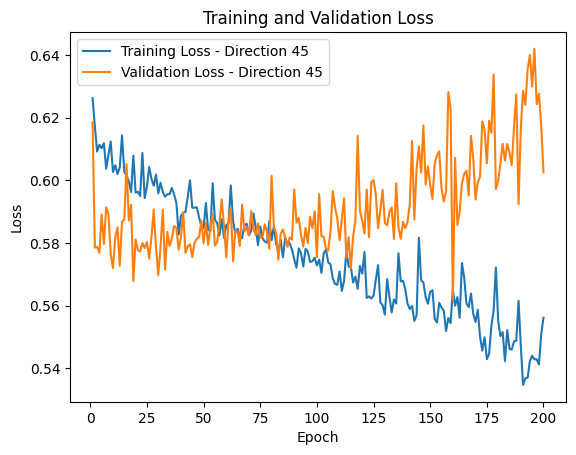

6/6 [==============================] - 0s 3ms/step
Best Model: <keras.wrappers.scikit_learn.KerasClassifier object at 0x00000214DC555A90>
Best Accuracy of Model: 0.6760416666666668

30/30 [==============================] - 0s 539us/step
Training Accuracy: 0.7104166666666667
Validation Accuracy: 0.675
Training F1 Score: 0.7110187110187112
Validation F1 Score: 0.6548672566371682
Training Precision: 0.7125
Validation Precision: 0.6851851851851852
Cross-Validation Scores: [0.66145833 0.59895833 0.73958333 0.66145833 0.66145833]
      Contrast_90    ASM_90  Entropy_90   Mean_90    IDM_90  Label
0        0.375720 -0.557690   -0.047737 -0.459268 -0.078325    0.0
1       -1.184706 -1.271082    0.226403 -1.833634  0.106960    0.0
2        0.129719 -0.904269    0.329604 -0.997136 -0.017579    0.0
3        2.681760  5.575218   -0.859663  3.443733  0.059382    0.0
4       -1.184706  0.866295   -0.117553  0.988058 -0.036714    0.0
...           ...       ...         ...       ...       ...    ...
1

C:\Users\hanif\AppData\Local\Temp\ipykernel_2112\1327083212.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_direction.loc[:600, 'Label'] = 0
C:\Users\hanif\AppData\Local\Temp\ipykernel_2112\1327083212.py:53: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


24/24 [==============================] - 0s 678us/step


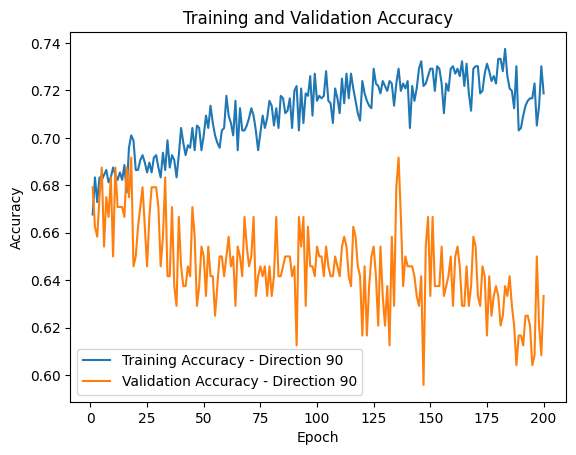

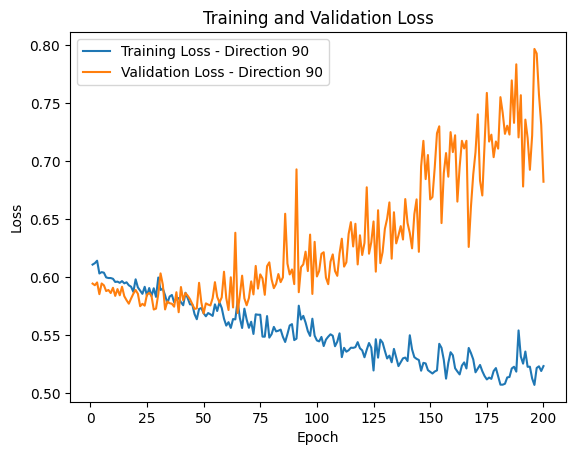

6/6 [==============================] - 0s 0s/step
Best Model: <keras.wrappers.scikit_learn.KerasClassifier object at 0x00000214E5BE34F0>
Best Accuracy of Model: 0.671875

30/30 [==============================] - 0s 538us/step
Training Accuracy: 0.7333333333333333
Validation Accuracy: 0.6333333333333333
Training F1 Score: 0.7316561844863733
Validation F1 Score: 0.6173913043478261
Training Precision: 0.739406779661017
Validation Precision: 0.6339285714285714
Cross-Validation Scores: [0.640625   0.58333333 0.71354167 0.64583333 0.67708333]
      Contrast_135   ASM_135  Entropy_135  Mean_135   IDM_135  Label
0         0.328615 -0.557690    -0.047737 -0.459268 -0.078325    0.0
1        -1.276179 -1.271082     0.226403 -1.833634  0.106960    0.0
2        -1.276179 -0.904269     0.329604 -0.997136 -0.017579    0.0
3         2.700223  5.575218    -0.859663  3.443733  0.059382    0.0
4         1.100519  0.866295    -0.117553  0.988058 -0.036714    0.0
...            ...       ...          ...  

C:\Users\hanif\AppData\Local\Temp\ipykernel_2112\1327083212.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_direction.loc[:600, 'Label'] = 0
C:\Users\hanif\AppData\Local\Temp\ipykernel_2112\1327083212.py:53: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


24/24 [==============================] - 0s 640us/step


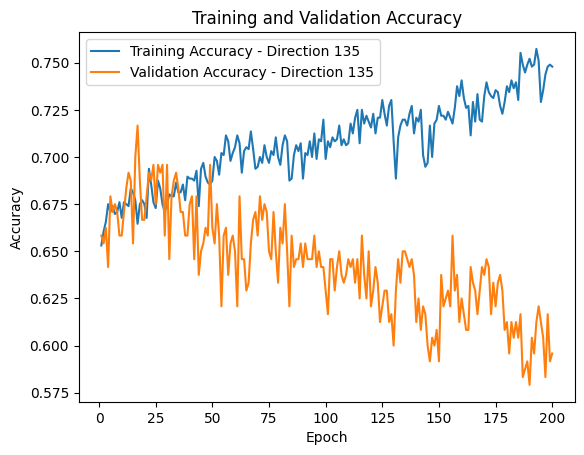

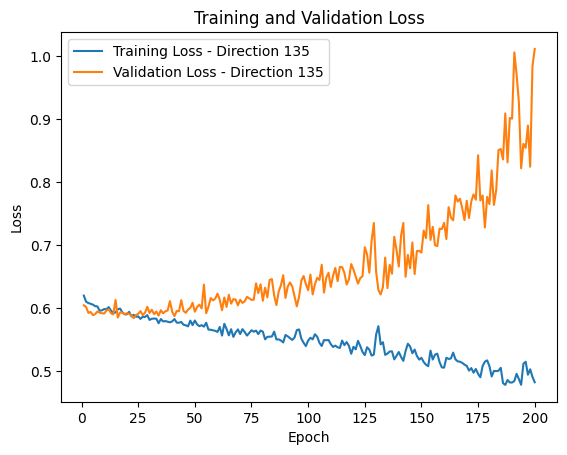

6/6 [==============================] - 0s 798us/step
Best Model: <keras.wrappers.scikit_learn.KerasClassifier object at 0x00000214E903D580>
Best Accuracy of Model: 0.6687500000000001

30/30 [==============================] - 0s 654us/step
Training Accuracy: 0.753125
Validation Accuracy: 0.5958333333333333
Training F1 Score: 0.750263435194942
Validation F1 Score: 0.5688888888888888
Training Precision: 0.7623126338329764
Validation Precision: 0.5981308411214953
Cross-Validation Scores: [0.65625    0.578125   0.703125   0.6875     0.66145833]
Execution Time: 390.68795824050903 seconds


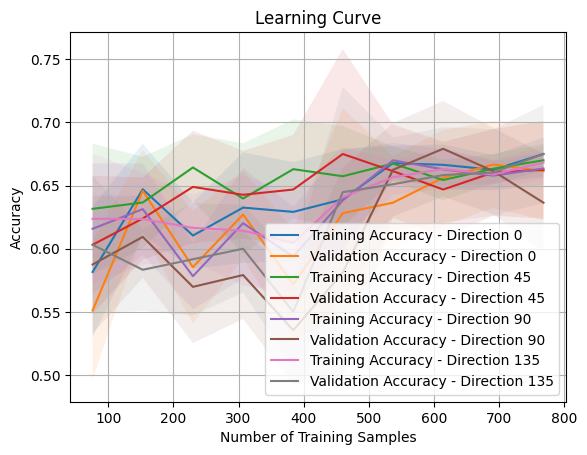

Average Accuracy: 0.7328125000000001
Average F1 Score: 0.7287144081930002
Average Precision: 0.7437847384309696


In [2]:
def create_model(units_1=64, units_2=32, units_3=16, units_4=8, learning_rate=0.001):
    model = Sequential()
    model.add(Dense(units_1, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(units_2, activation='relu'))
    model.add(Dense(units_3, activation='relu'))
    model.add(Dense(units_4, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    return model

# List of directions
directions = ['0', '45', '90', '135']
# Hapus kolom image
data.drop('Image', axis=1, inplace=True)
# Memisahkan DataFrame berdasarkan arah
dfs = [data.filter(regex=f'_{direction}$') for direction in directions]

# Set the 'Label' column values using .loc

accuracies = []
f1score = []
precision = []
index_column = ["Akurasi", "F1_Score", "Presisi"]
# Loop through each direction
train_mean_list = []
test_mean_list = []
val_train_mean_list = []
val_test_mean_list = []

start_time = time.time()

for direction in directions:
    # Select the corresponding DataFrame
    df_direction = dfs[directions.index(direction)]
    df_direction.loc[:600, 'Label'] = 0
    df_direction.loc[600:, 'Label'] = 1
    # Prepare the data
    X = df_direction.drop('Label', axis=1).values
    y = df_direction['Label'].values
    print(df_direction)
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize the features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # Create the KerasClassifier wrapper for scikit-learn compatibility
    model = KerasClassifier(build_fn=create_model, verbose=0)
    
    # Define the hyperparameter grid for Random Search
    param_grid = {
        'units_1': [32, 64, 128],
        'units_2': [16, 32, 64],
        'units_3': [8, 16, 32],
        'units_4': [4, 8, 16],
        'learning_rate': [0.001, 0.01, 0.1]
    }
    
    # Perform Random Search
    random_search = RandomizedSearchCV(model, param_distributions=param_grid, cv=3, scoring='accuracy', n_iter=15)
    random_search.fit(X_train, y_train)
    
    # Get the best model and its accuracy
    best_model = random_search.best_estimator_
    best_acc = random_search.best_score_



    train_sizes, train_scores, test_scores = learning_curve(
        best_model, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    train_mean_list.append(train_mean)
    test_mean_list.append(test_mean)
    
    # Pelatihan model dengan 100 epoch
    model = best_model.model  # Dapatkan model asli dari KerasClassifier
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200,batch_size=32, verbose=0)

    # Mengambil akurasi dan loss dari setiap epoch
    accuracy = history.history['accuracy']
    loss = history.history['loss']
    val_accuracy = history.history['val_accuracy']
    val_loss = history.history['val_loss']
    
    

    # Menghasilkan grafik akurasi
    plt.plot(range(1, len(accuracy) + 1), accuracy, label='Training Accuracy - Direction {}'.format(direction))
    plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy - Direction {}'.format(direction))
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.show()

    # Menghasilkan grafik loss
    plt.plot(range(1, len(loss) + 1), loss, label='Training Loss - Direction {}'.format(direction))
    plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss - Direction {}'.format(direction))
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()
    
    
    # Make predictions on the test set
    y_pred = best_model.predict(X_test)
    y_pred = [round(x[0]) for x in y_pred]

    cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')
    # Print the results
    print("Best Model:", best_model)
    print("Best Accuracy of Model:", best_acc)
    
    print()
    
    # Calculate the accuracy, F1 score, and precision
    train_acc = accuracy_score(y_train, best_model.predict(X_train))
    val_acc = accuracy_score(y_test, y_pred)

    train_f1 = f1_score(y_train, best_model.predict(X_train))
    val_f1 = f1_score(y_test, y_pred)

    train_prec = precision_score(y_train, best_model.predict(X_train))
    val_prec = precision_score(y_test, y_pred)

    # Print the results
    print("Training Accuracy:", train_acc)
    print("Validation Accuracy:", val_acc)
    print("Training F1 Score:", train_f1)
    print("Validation F1 Score:", val_f1)
    print("Training Precision:", train_prec)
    print("Validation Precision:", val_prec)
    print("Cross-Validation Scores:", cv_scores)

    accuracies.append(train_acc)
    f1score.append(train_f1)
    precision.append(train_prec)
    
end_time = time.time()
execution_time = end_time - start_time

print("Execution Time:", execution_time, "seconds")

plt.figure()
for direction, train_mean, test_mean in zip(directions, train_mean_list, test_mean_list):
    plt.plot(train_sizes, train_mean, label=f'Training Accuracy - Direction {direction}')
    plt.plot(train_sizes, test_mean, label=f'Validation Accuracy - Direction {direction}')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)

plt.xlabel('Number of Training Samples')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# Calculate and print the average accuracy
average_accuracy = np.mean(accuracies)
average_f1score = np.mean(f1score)
average_precision = np.mean(precision)

print("Average Accuracy:", average_accuracy)
print("Average F1 Score:", average_f1score)
print("Average Precision:", average_precision)

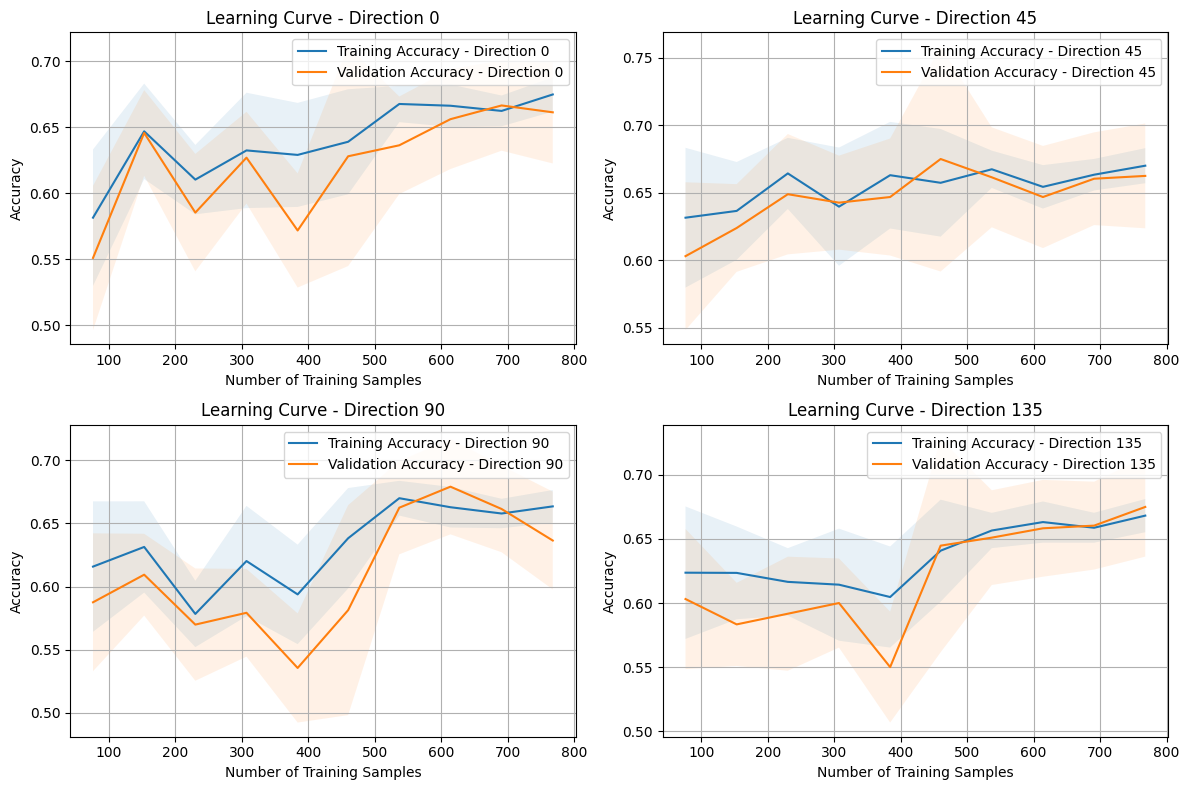

In [3]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

for i, (direction, train_mean, test_mean) in enumerate(zip(directions, train_mean_list, test_mean_list)):
    row = i // 2  # Menentukan baris subplot
    col = i % 2  # Menentukan kolom subplot
    ax = axes[row, col]  # Mengambil sumbu subplot pada baris dan kolom yang sesuai
    ax.plot(train_sizes, train_mean, label=f'Training Accuracy - Direction {direction}')
    ax.plot(train_sizes, test_mean, label=f'Validation Accuracy - Direction {direction}')
    ax.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
    ax.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
    ax.set_xlabel('Number of Training Samples')
    ax.set_ylabel('Accuracy')
    ax.set_title(f'Learning Curve - Direction {direction}')
    ax.legend(loc='best')
    ax.grid(True)

plt.tight_layout()  # Untuk menjaga jarak antara subplot
plt.show()

In [4]:
degree_ = [" ","0","45","90","135", "Avarage"]

data = {
    degree_[0] : index_column,
    degree_[1] : [accuracies[0], f1score[0], precision[0]],
    degree_[2] : [accuracies[1], f1score[1], precision[1]],
    degree_[3] : [accuracies[2], f1score[2], precision[2]],
    degree_[4] : [accuracies[3], f1score[3], precision[3]],
    degree_[5] : [average_accuracy, average_f1score, average_precision],
}

In [5]:
df2 = pd.DataFrame(data)
print(df2)



                    0        45        90       135   Avarage
0   Akurasi  0.734375  0.710417  0.733333  0.753125  0.732813
1  F1_Score  0.721919  0.711019  0.731656  0.750263  0.728714
2   Presisi  0.760920  0.712500  0.739407  0.762313  0.743785


In [6]:
print(df.head())

               Image  Contrast_0  Contrast_45  Contrast_90  Contrast_135   
0    Alcoholic_0.png    0.287182    -0.527308     0.375720      0.328615  \
1    Alcoholic_1.png   -1.745655    -1.672462    -1.184706     -1.276179   
2   Alcoholic_10.png   -1.111166    -1.020774     0.129719     -1.276179   
3  Alcoholic_100.png   -0.632149     4.098488     2.681760      2.700223   
4  Alcoholic_101.png   -0.339730     0.978283    -1.184706      1.100519   

      ASM_0    ASM_45    ASM_90   ASM_135  Entropy_0  ...  Entropy_90   
0 -0.557690 -0.557690 -0.557690 -0.557690  -0.047737  ...   -0.047737  \
1 -1.271082 -1.271082 -1.271082 -1.271082   0.226403  ...    0.226403   
2 -0.904269 -0.904269 -0.904269 -0.904269   0.329604  ...    0.329604   
3  5.575218  5.575218  5.575218  5.575218  -0.859663  ...   -0.859663   
4  0.866295  0.866295  0.866295  0.866295  -0.117553  ...   -0.117553   

   Entropy_135    Mean_0   Mean_45   Mean_90  Mean_135     IDM_0    IDM_45   
0    -0.047737 -0.459268 -

In [7]:
threshold = 0.07

# Mendefinisikan status model
model_status = []

# Memeriksa setiap kurva pembelajaran
for direction, train_mean, test_mean in zip(directions, train_mean_list, test_mean_list):
    train_diff = np.abs(train_mean - test_mean)  # Selisih antara akurasi pelatihan dan validasi
    max_diff = np.max(train_diff)  # Nilai selisih maksimum
    
    if max_diff > threshold:  # Jika selisih maksimum melebihi threshold, model dianggap overfitting
        status = 'Overfitting'
    elif np.mean(train_mean) < 0.5:  # Jika akurasi pelatihan rata-rata rendah, model dianggap underfitting
        status = 'Underfitting'
    else:  # Jika tidak memenuhi kriteria di atas, model dianggap baik
        status = 'Good'
    
    model_status.append((direction, status))

# Menampilkan hasil evaluasi model
for direction, status in model_status:
    print(f"Direction: {direction}\tStatus: {status}")

Direction: 0	Status: Good
Direction: 45	Status: Good
Direction: 90	Status: Good
Direction: 135	Status: Good
